In [11]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

### Data processing
tf.random.set_seed(1)

In [10]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.boston_housing.load_data()

# Normalization
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

Y_train = tf.expand_dims(Y_train, axis=1)
Y_test = tf.expand_dims(Y_test, axis=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_train[0])

# dim_target = 12

# # X_train_1D = X_train[:, dim_target] # tf.matmul할때 matrix로 인식을 못해서 에러남
# X_train_1D = tf.expand_dims(X_train[:, dim_target], axis=1)
# X_test_1D = tf.expand_dims(X_test[:, dim_target], axis=1)

# print(X_train_1D.shape)
# print(X_test_1D.shape)
# print(Y_train_1D.shape)
# print(Y_test_1D.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


### Define Neural Network

In [13]:
class NeuralNet(Model):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.relu, input_shape=[13,])
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(1)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x

neural_net = NeuralNet()

In [4]:
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64)) 
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
lr = 0.01
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=False)
        loss = cross_entropy_loss(pred, y)
        
    parameters = neural_net.trainable_variables
    gradients = g.gradient(loss, parameters)
    optimizer.apply_gradients(zip(gradients, parameters))

In [6]:
# Use tf.data API to shuffle and batch data.
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 40
display_epoch = 4

# Run training for the given number of steps.
for epo in range(1,epoch+1):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
        
    if epo % display_epoch == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("epoch: ", epo, ", loss: ", loss.numpy(), ", acc: ", acc.numpy())

epoch:  4 , loss:  2.28206 , acc:  0.265
epoch:  8 , loss:  2.219191 , acc:  0.325
epoch:  12 , loss:  2.1288974 , acc:  0.445
epoch:  16 , loss:  2.006538 , acc:  0.47
epoch:  20 , loss:  1.886662 , acc:  0.705
epoch:  24 , loss:  1.8555429 , acc:  0.715
epoch:  28 , loss:  1.7751992 , acc:  0.785
epoch:  32 , loss:  1.7416252 , acc:  0.77
epoch:  36 , loss:  1.6857791 , acc:  0.83
epoch:  40 , loss:  1.684853 , acc:  0.805


In [7]:
# Test model on validation set.
pred = neural_net(x_test)
print("Test Accuracy: ", accuracy(pred, y_test).numpy())

Test Accuracy:  0.8011


In [8]:
# Visualize predictions.
import matplotlib.pyplot as plt

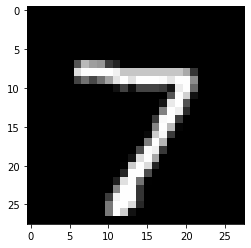

Model prediction: 7


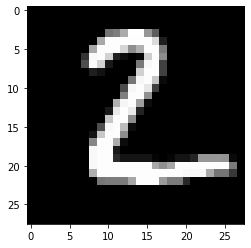

Model prediction: 2


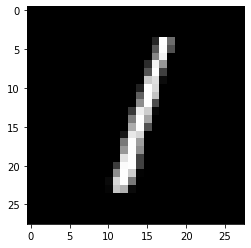

Model prediction: 1


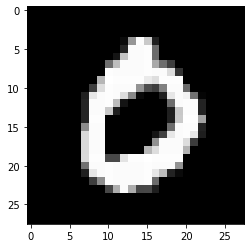

Model prediction: 0


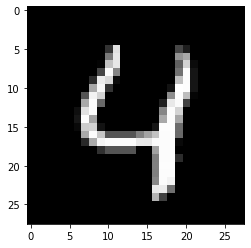

Model prediction: 4


In [9]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

### Keras API

In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [13]:
# Prepare MNIST data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Convert to float32.
x_train = x_train.astype("float32")/ 255.0
x_test = x_test.astype("float32")/255.0
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
num_classes = 10



# Flatten images to 1-D vector of 784 features (28*28).
# Normalize images value from [0, 255] to [0, 1].


In [42]:
layer1 = Flatten(input_shape=(28, 28))
layer2 = Dense(128, activation= 'relu')
layer3 = Dense(256, activation='relu')
layer4 = Dense(10) # 10 = number of class 
# layer4 = Dense(10, activation ='softmax')



In [43]:
mlp = Sequential([layer1, layer2, layer3, layer4])

In [44]:
mlp.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

# mlp.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
#### 주의 !! 위 처럼 했을경우 학습이 발생하지 않습니다. 만약 위처럼 정의하기 원한다면 layer4를 주석 단 부분처럼 교체해주셔야 합니다. ###


In [45]:
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [46]:
# mlp.fit(x_train, y_train, epochs = 6, batch_size=32)
result = mlp.fit(x_train, y_train, batch_size =32, epochs = 6)

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 3.2821 - accuracy: 0.1156
Epoch 2/6
1875/1875 [==============================] - 2s 1ms/step - loss: 2.8948 - accuracy: 0.1263
Epoch 3/6
1875/1875 [==============================] - 2s 1ms/step - loss: 3.0762 - accuracy: 0.1312
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 

In [38]:
mlp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.6803 - accuracy: 0.0892


[14.680335998535156, 0.08919999748468399]

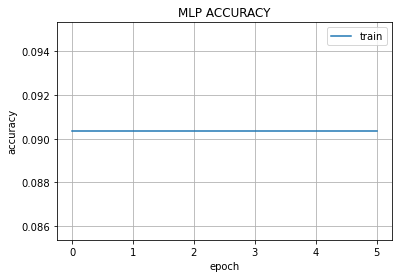

In [40]:
plt.plot(result.history['accuracy'])
plt.title('MLP ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
                                                                                                            ***********************************************************************-********++*+*****+*+**+                                         